In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 전기장(electric field)

$$|\mathbf{F_{12}}|=k\frac{q_1 q_2}{r^2}$$

$$\mathbf{F_{12}} = |\mathbf{F_{12}}|(\mathbf{R_{12}})$$
($\mathbf{R_{12}}$ is unit vector of $Q_2 - Q_1$}})



In [30]:
qp = np.array(([0, 0], [2, 0], [-2, 0],), dtype=np.float32)
qs = np.array((1, +2, -3,), dtype=np.float32)

def unit(x):
    r = np.sqrt(np.sum(x**2))
    if r >= 0.5:
        return 0.5*x/np.sqrt(np.sum(x**2))
    else:
        return x

def calculate_electric_force(pos, charge, qp, qs):
    k = 0.1
    
    net = np.zeros(2)
    
    for p, q in zip(qp, qs):
        r = np.sqrt(np.sum((pos - p)**2))
        if r <= 0.01:
            return np.zeros(2)
        R21 = (pos - p)/r
        F21 = k * (q * charge)/r**2 * R21
        net += F21
    return net

calc = lambda x, c: calculate_electric_force(x, c, qp, qs)


In [33]:
x, y = np.meshgrid(np.linspace(-2, 2, 17), np.linspace(-2, 2, 17))
x = np.vstack((x.flatten(), y.flatten())).T
v = np.array([unit(calc(p, 1)) for p in x])

X = x.T[0]
Y = x.T[1]
U = v.T[0]
V = v.T[1]

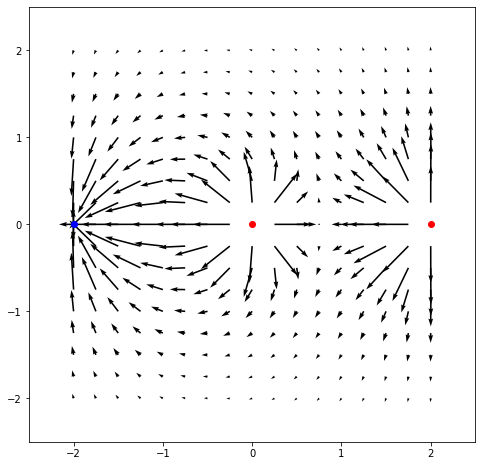

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_xlim((-2.5, 2.5))
ax.set_ylim((-2.5, 2.5))

ax.quiver(X, Y, U, V)
#ax.imshow(np.sqrt(U**2+V**2).reshape(17, 17), extent=(-2, 2, -2, 2), interpolation='gaussian', cmap=plt.cm.Reds, vmin=0, vmax=0.25)
for p, q in zip(qp, qs):
    ax.plot(*p, marker='o', color='red' if q > 0 else 'blue' )